In [105]:
library(tidyverse)
library(repr)
library(tidymodels)

In [106]:
data <- read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod", skip = 19, col_names=FALSE) 
colnames(data) <- c("age", "sex", "chest_pain_type", "resting_blood_pres", "cholesteral", "fasting_blood_sugar < 120", "resting_ecg", "max_heart_rate", "exercise_induced_angina", "oldpeak", "slope", "number_of_vessels_colored", "thal", "healthy_or_sick", "sickness_classifier")



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_double(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_character(),
  X15 = col_character()
)



In [107]:
data

age,sex,chest_pain_type,resting_blood_pres,cholesteral,fasting_blood_sugar < 120,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_vessels_colored,thal,healthy_or_sick,sickness_classifier
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
63,male,angina,145,233,true,hyp,150,fal,2.3,down,0.0,fix,buff,H
67,male,asympt,160,286,fal,hyp,108,true,1.5,flat,3.0,norm,sick,S2
67,male,asympt,120,229,fal,hyp,129,true,2.6,flat,2.0,rev,sick,S1
37,male,notang,130,250,fal,norm,187,fal,3.5,down,0.0,norm,buff,H
41,fem,abnang,130,204,fal,hyp,172,fal,1.4,up,0.0,norm,buff,H
56,male,abnang,120,236,fal,norm,178,fal,0.8,up,0.0,norm,buff,H
62,fem,asympt,140,268,fal,hyp,160,fal,3.6,down,2.0,norm,sick,S3
57,fem,asympt,120,354,fal,norm,163,true,0.6,up,0.0,norm,buff,H
63,male,asympt,130,254,fal,hyp,147,fal,1.4,flat,1.0,rev,sick,S2


In [108]:
data_selected <- data |>
    select("age", "resting_blood_pres", "cholesteral", "max_heart_rate", "oldpeak", "number_of_vessels_colored", "healthy_or_sick", "sickness_classifier")

data_selected





age,resting_blood_pres,cholesteral,max_heart_rate,oldpeak,number_of_vessels_colored,healthy_or_sick,sickness_classifier
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
63,145,233,150,2.3,0.0,buff,H
67,160,286,108,1.5,3.0,sick,S2
67,120,229,129,2.6,2.0,sick,S1
37,130,250,187,3.5,0.0,buff,H
41,130,204,172,1.4,0.0,buff,H
56,120,236,178,0.8,0.0,buff,H
62,140,268,160,3.6,2.0,sick,S3
57,120,354,163,0.6,0.0,buff,H
63,130,254,147,1.4,1.0,sick,S2


In [109]:
data_cholesteral <- data_selected |>
    select(cholesteral, healthy_or_sick)

data_cholesteral

cholesteral,healthy_or_sick
<dbl>,<chr>
233,buff
286,sick
229,sick
250,buff
204,buff
236,buff
268,sick
354,buff
254,sick


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



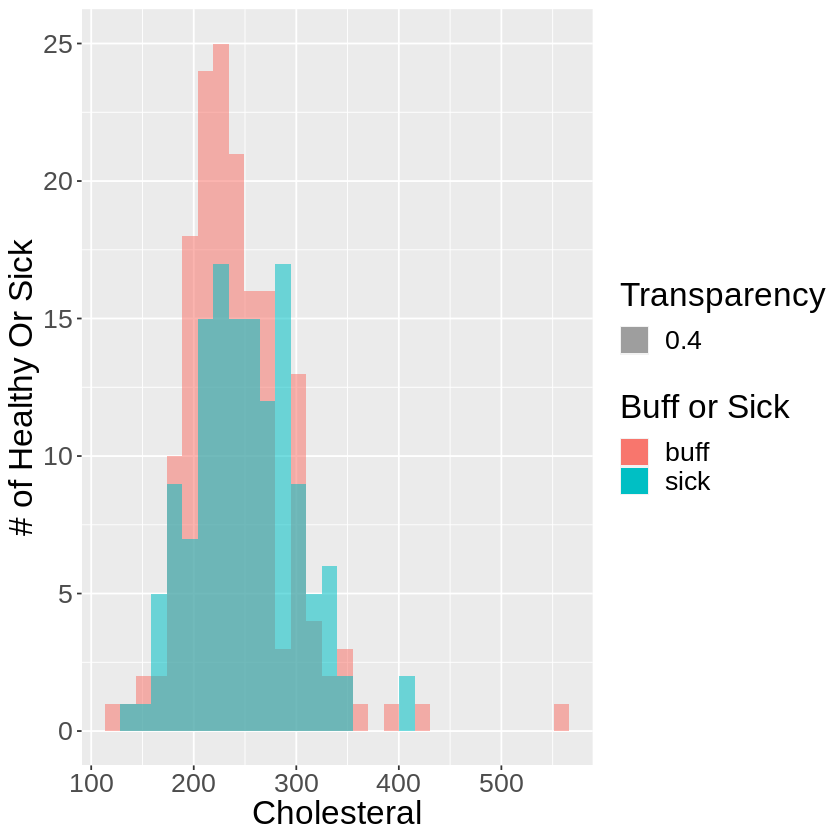

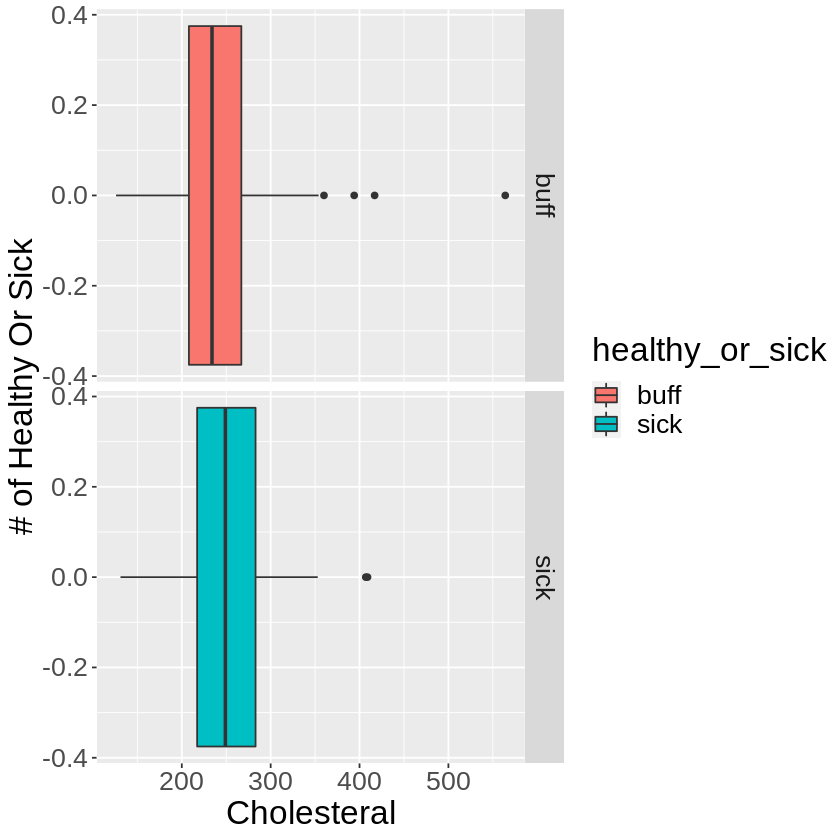

In [111]:
histogram_plot_cholesteral <- data_cholesteral |>
    ggplot(aes(x = cholesteral, fill = healthy_or_sick, alpha = 0.4)) +
    geom_histogram(position = "identity") +
    labs(x = "Cholesteral", y = "# of Healthy Or Sick", fill = "Buff or Sick", alpha = "Transparency") +
    theme(text = element_text(size = 20))

box_plot_cholesteral <- data_cholesteral |>
    ggplot(aes(x = cholesteral, fill = healthy_or_sick)) +
    geom_boxplot() +
    labs(x = "Cholesteral", y = "# of Healthy Or Sick") +
    theme(text = element_text(size = 20)) +
    facet_grid(rows = vars(healthy_or_sick))




#Bar plot wouldn't work for this since the data set is too large and too messy!

histogram_plot_cholesteral
box_plot_cholesteral


In [ ]:
From the bar chart, the proportional relationship between sick and healthy people as their cholesteral level increases overlaps.
From both the bar chart and box chart, I would conclude that cholesteral level does not play a significant role on health issues.